In [3]:
%matplotlib notebook

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


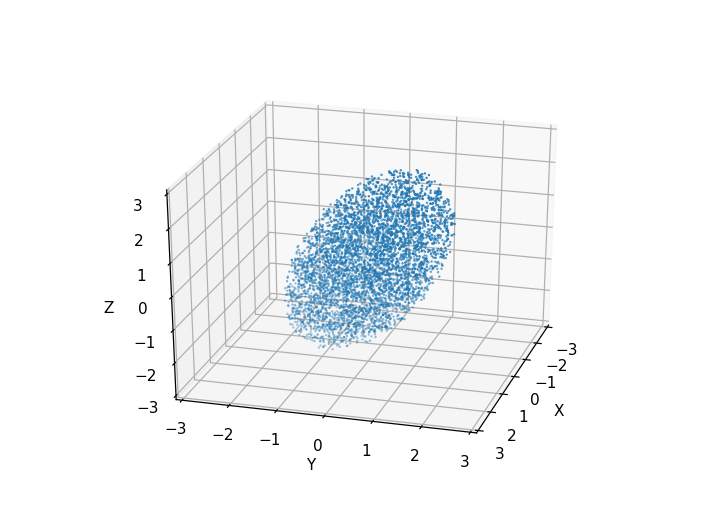

(-3, 3)

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')

data=np.loadtxt('CuerposCelestes.dat')

xdata, ydata, zdata= data[:,0], data[:,1], data[:,2]
ax.scatter3D(xdata, ydata, zdata, s=0.3);
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim(3,-3)
ax.set_ylim(3,-3)
ax.set_zlim(-3,3)

#plt.show()

### Punto a

In [64]:
m=1
e1=np.array([1,0,0])
e2=np.array([0,1,0])
e3=np.array([0,0,1])

E=np.outer(e1,e1)+np.outer(e2,e2)+np.outer(e3,e3)

I=0
for rk in data:
    I+= m*(np.dot(rk,rk)*E-np.outer(rk,rk))
    
print("El tensor de inercia:\n {}".format(I))

El tensor de inercia:
 [[ 1.11638178e+04  2.05248547e+00  7.42865762e-01]
 [ 2.05248547e+00  8.95207032e+03 -2.34834623e+03]
 [ 7.42865762e-01 -2.34834623e+03  4.23411270e+03]]


### Punto b 

In [51]:
evals, evecs = np.linalg.eig(I)
print("Eigenvalues:{}".format(evals))
print("Eigenvectors:\n{}".format(evecs))

Eigenvalues:[11163.82020505  9921.67935792  3264.50128356]
Eigenvectors:
[[ 9.99999139e-01  1.29907114e-03 -1.86085626e-04]
 [ 1.27176354e-03 -9.24310243e-01  3.81639828e-01]
 [-3.23776435e-04  3.81639736e-01  9.24311099e-01]]


Si los valores propios son cercanos o iguales implica que existe una simetría en dichas dimensiones

### Punto c 

<IPython.core.display.Javascript object>


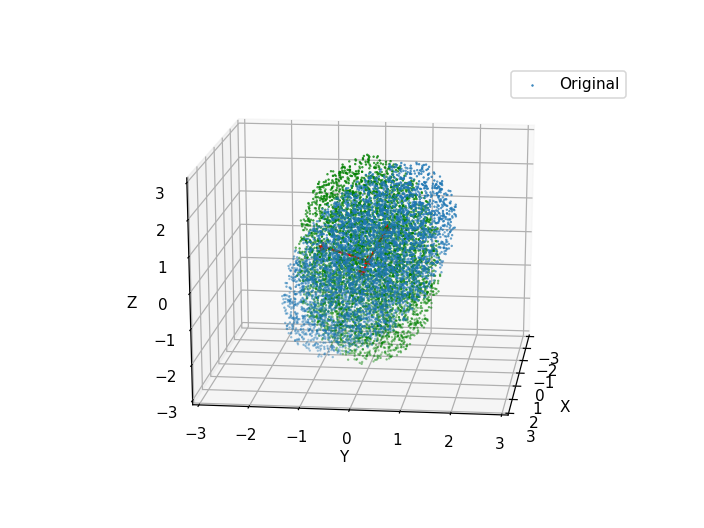

In [65]:
data2=data@evecs
#data2=np.matmul(data,evecs)
fig = plt.figure()
ax = plt.axes(projection='3d')

data=np.loadtxt('CuerposCelestes.dat')

xdata, ydata, zdata= data[:,0], data[:,1], data[:,2]
ax.scatter(xdata, ydata, zdata, s=0.3,label='Original')
ax.scatter(data2[:,0], data2[:,1], data2[:,2], s=0.3, c="green")

evec1=np.array([[0,0,0],evecs[:,0]])
evec2=np.array([[0,0,0],evecs[:,1]])
evec3=np.array([[0,0,0],evecs[:,2]])

ax.plot(evec1[:,0],evec1[:,1], evec1[:,2], c="red", marker="*")
ax.plot(evec2[:,0],evec2[:,1], evec2[:,2], c="red", marker="*")
ax.plot(evec3[:,0],evec3[:,1], evec3[:,2], c="red", marker="*")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim(3,-3)
ax.set_ylim(3,-3)
ax.set_zlim(-3,3)

ax.legend()